In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CONFIGURACIÓN GENERAL
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# 1. Cargar datos
df = pd.read_csv('data.csv', sep=';')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
# 2. Resumen general
print(f"Observaciones: {df.shape[0]}, Variables: {df.shape[1]}")
df.head()

Observaciones: 4424, Variables: 37


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# 3. Tipos de variables
df.dtypes.value_counts()

int64      29
float64     7
object      1
Name: count, dtype: int64

In [6]:
# 4. Valores faltantes
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Nulos': missing, 'Porcentaje': missing_pct})
missing_df = missing_df[missing_df['Nulos'] > 0].sort_values('Porcentaje', ascending=False)
print("\nValores faltantes:")
missing_df


Valores faltantes:


,Nulos,Porcentaje


In [ ]:
# 5. Duplicados
print("\nDuplicados:", df.duplicated().sum())


Duplicados: 0


In [8]:
# 6. Estadísticas descriptivas
print("\nEstadísticas descriptivas de variables numéricas:")
df.describe().T


Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Resumen estadístico de las variables numéricas

El conjunto de datos contiene 4.424 observaciones con diversas variables relacionadas con el perfil académico y socioeconómico de los estudiantes. Se incluyen características como edad de matrícula (media: 23.3 años), nota de admisión (media: 127), situación de beca (24.8%), y género (35.2% femenino si se codifica como 1).
También se presentan estadísticas detalladas sobre rendimiento académico en unidades curriculares de ambos semestres, indicadores económicos como la tasa de desempleo e inflación, y variables categóricas transformadas en formato numérico.

Este resumen permite detectar posibles outliers, distribuciones sesgadas y variables con poca variabilidad que podrían requerir tratamiento previo al modelado.


Distribución variable objetivo:
          Cantidad  Porcentaje
Target                        
Graduate      2209        49.9
Dropout       1421        32.1
Enrolled       794        17.9


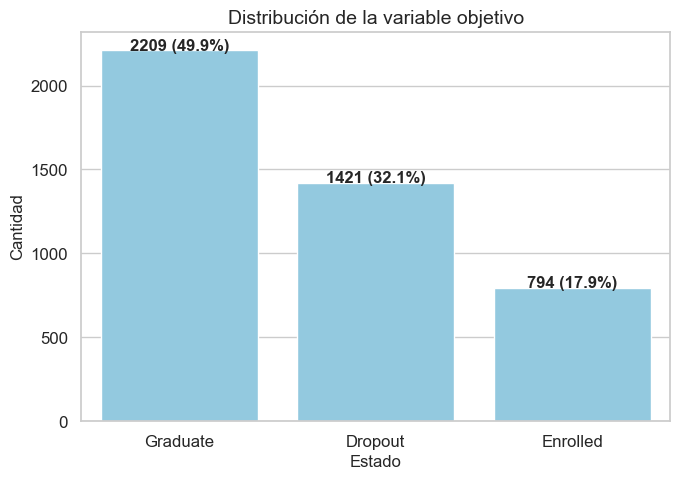

In [9]:
# 7. Variable objetivo (Target)
if 'Target' in df.columns:
    target_counts = df['Target'].value_counts()
    target_pct = df['Target'].value_counts(normalize=True) * 100
    print("\nDistribución variable objetivo:")
    print(pd.DataFrame({'Cantidad': target_counts, 'Porcentaje': target_pct.round(1)}))

    plt.figure(figsize=(7,5))
    bars = sns.countplot(x='Target', data=df, order=target_counts.index, color='skyblue')
    for i, v in enumerate(target_counts):
        bars.text(i, v + 2, f'{v} ({target_pct.iloc[i]:.1f}%)', ha='center', fontsize=12, fontweight='bold')
    plt.title('Distribución de la variable objetivo')
    plt.xlabel('Estado')
    plt.ylabel('Cantidad')
    plt.tight_layout()
    plt.show()

**Distribución de la variable objetivo**

La variable objetivo presenta una distribución desequilibrada entre las tres clases. La mayoría de los estudiantes están clasificados como Graduate (49.9%), seguidos por Dropout (32.1%) y finalmente Enrolled (17.9%). Este desbalance debe tenerse en cuenta al seleccionar y evaluar modelos predictivos, especialmente si se busca optimizar el rendimiento para clases minoritarias como Enrolled.

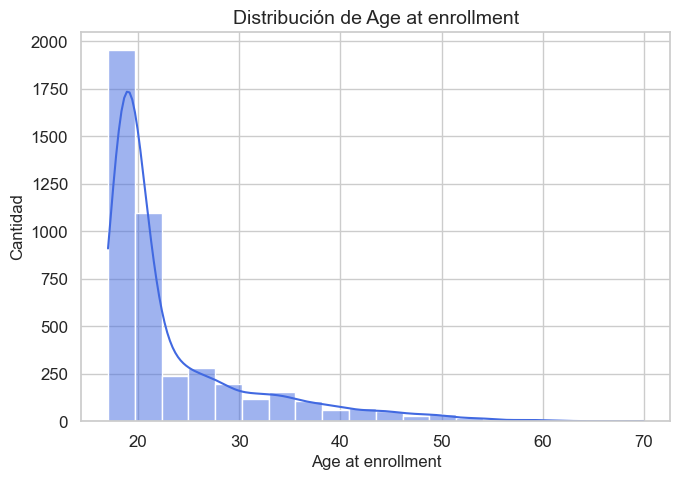

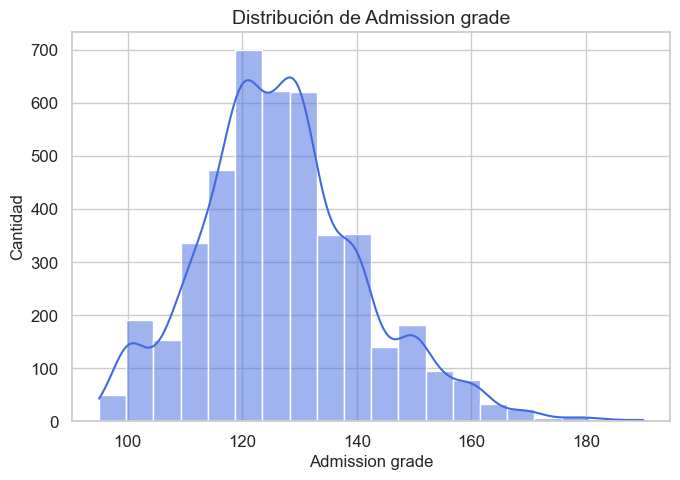

In [10]:
# 8. Histogramas para variables clave
for col in ['Age at enrollment', 'Admission grade']:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.histplot(df[col], bins=20, kde=True, color='royalblue')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Cantidad')
        plt.tight_layout()
        plt.show()


**Distribución de la edad al momento de la matrícula**

La mayoría de los estudiantes se matriculan entre los 18 y 22 años, con un fuerte pico alrededor de los 19 años. A partir de ahí, la frecuencia disminuye rápidamente, mostrando una cola larga hacia edades mayores. Esto sugiere que el grupo principal de estudiantes corresponde a jóvenes que ingresan directamente después de la educación secundaria, aunque también hay presencia de estudiantes adultos en menor proporción.

**Distribución de la nota de admisión**

La nota de admisión presenta una distribución aproximadamente normal, con una ligera asimetría a la derecha. La mayoría de los estudiantes tiene calificaciones entre 115 y 135 puntos, con un pico alrededor de 125. También se observan algunos casos con notas significativamente más altas o más bajas, aunque son menos frecuentes.

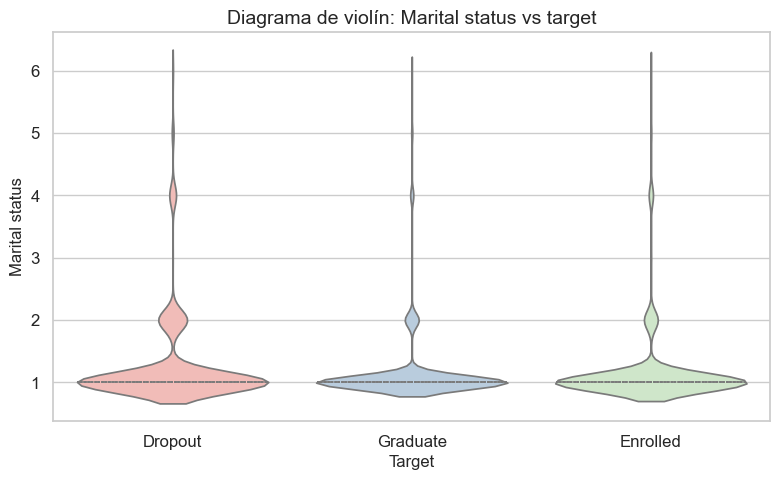

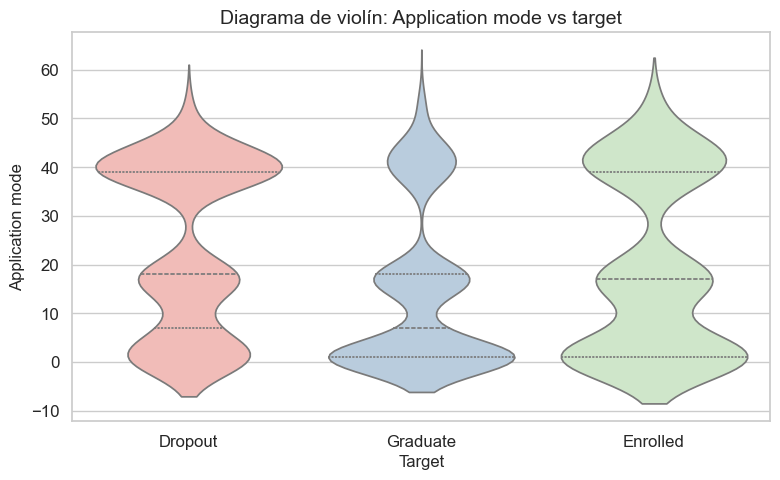

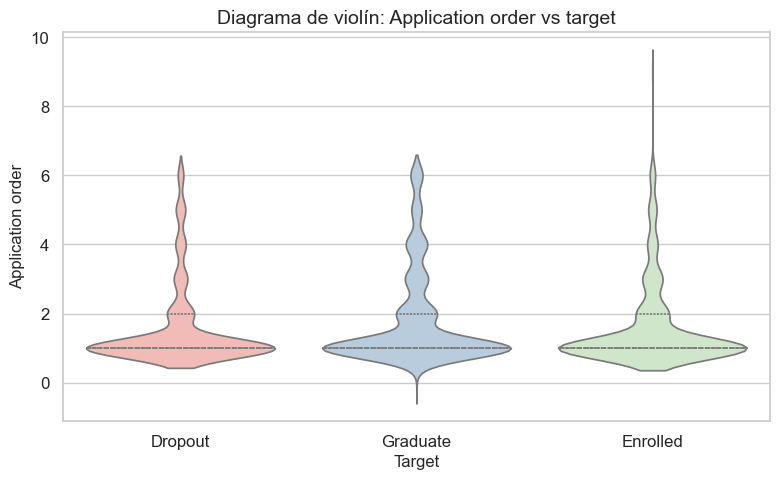

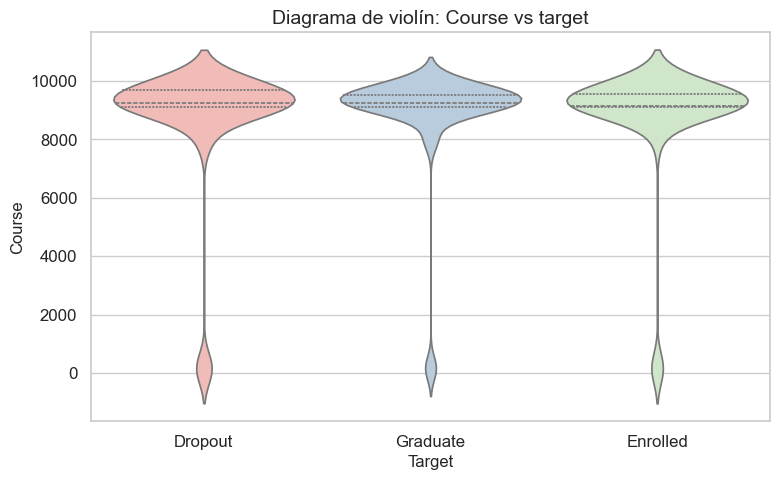

C:\Users\ihernan6\AppData\Local\Temp\ipykernel_1376\1963548627.py:12: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ihernan6\Desktop\rev_28\r28\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


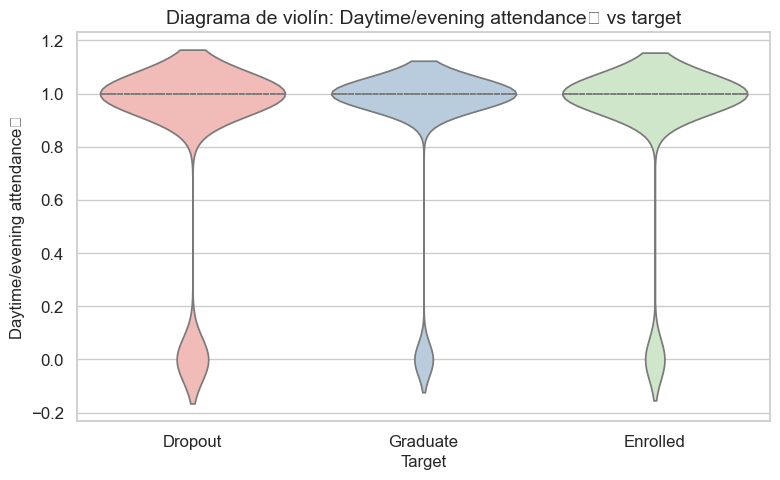

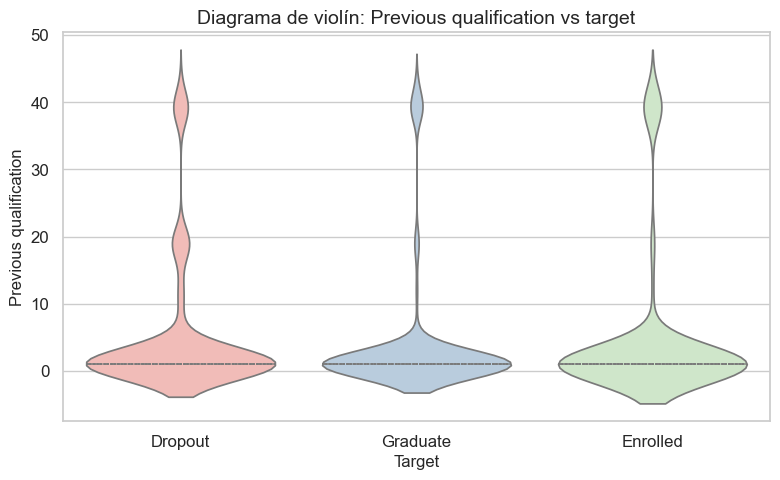

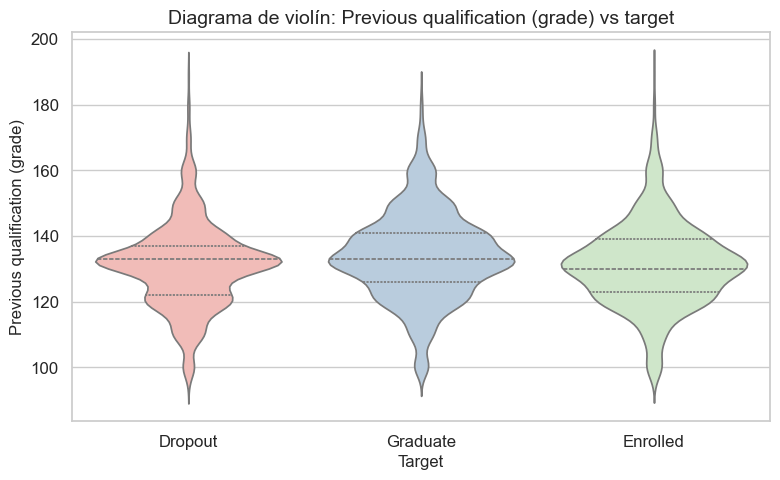

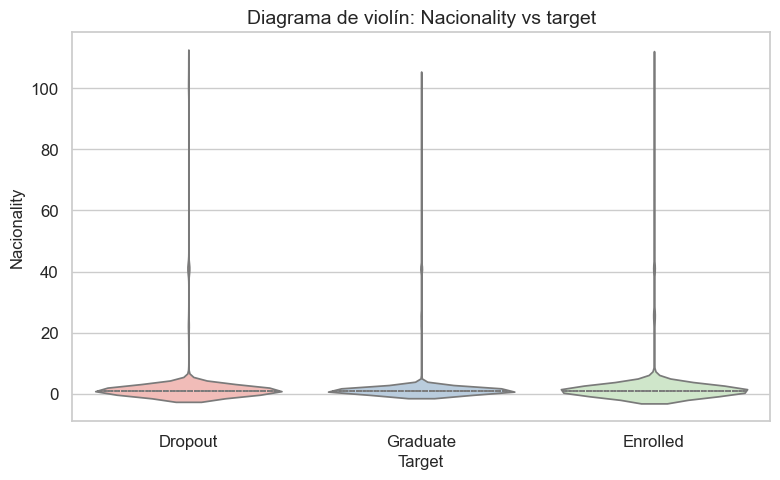

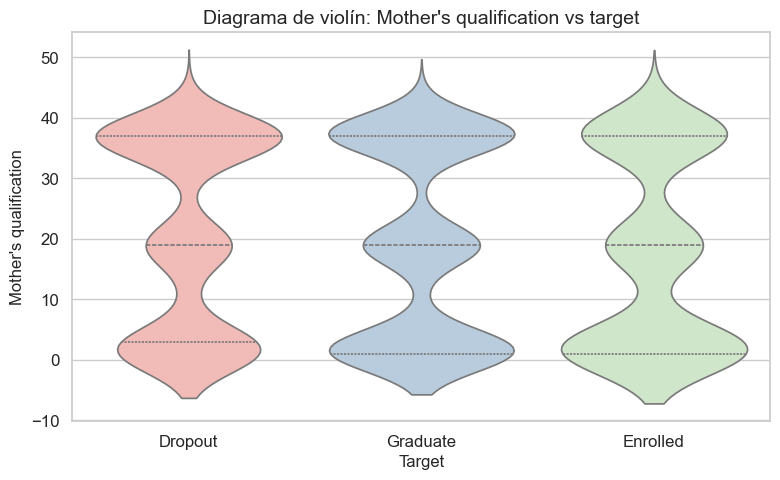

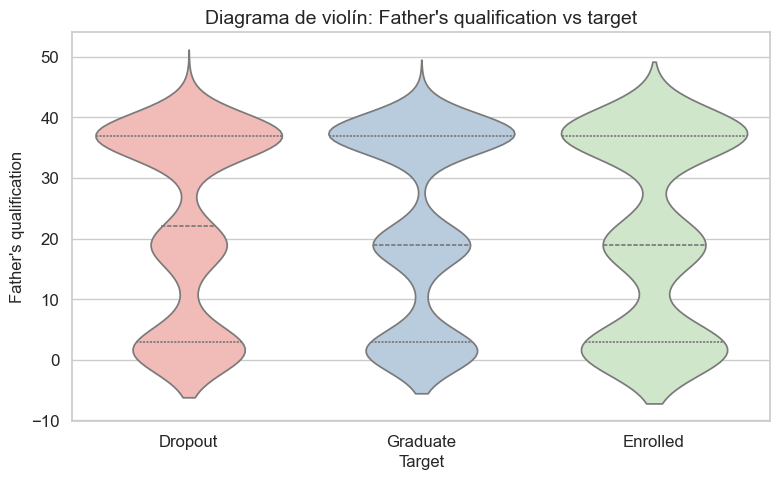

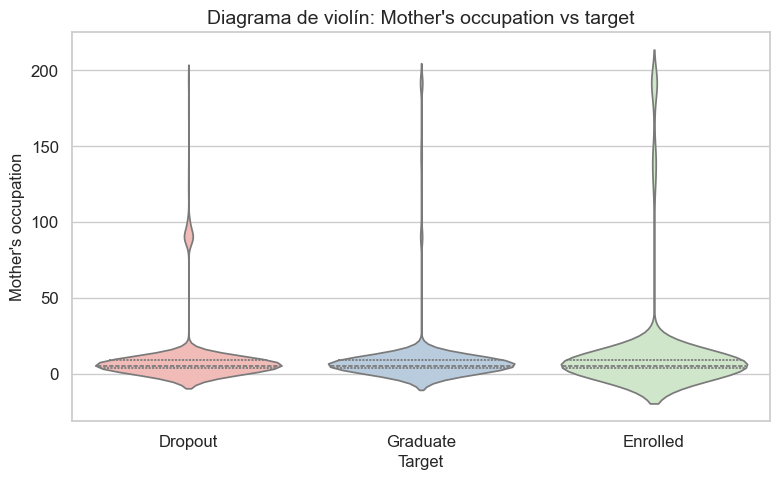

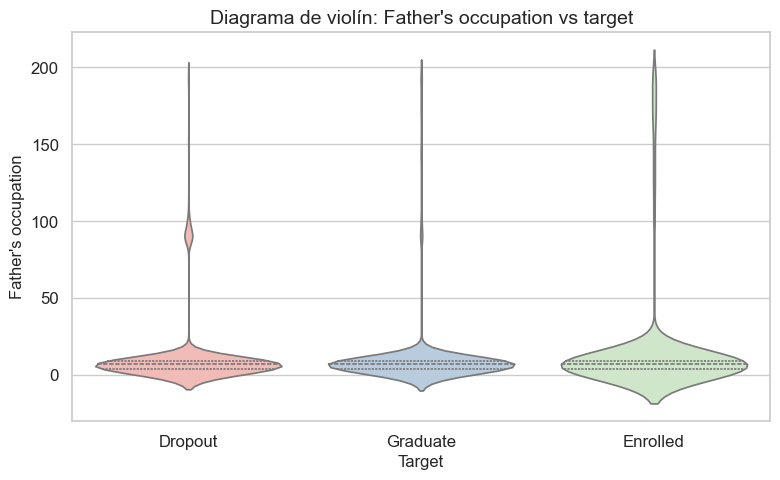

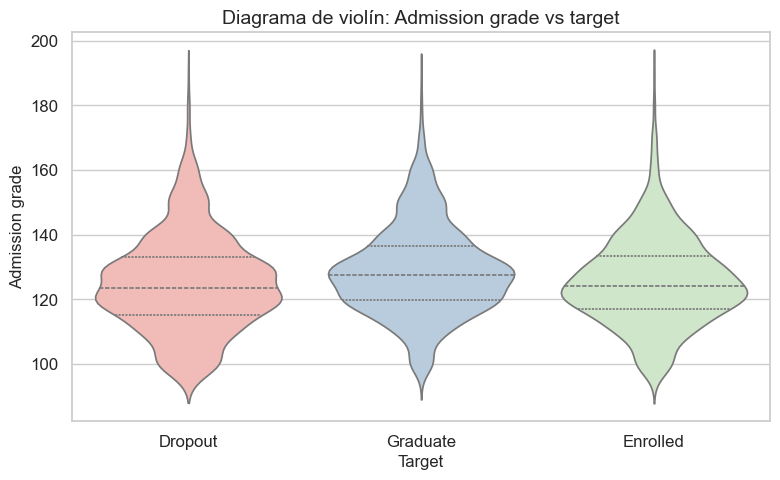

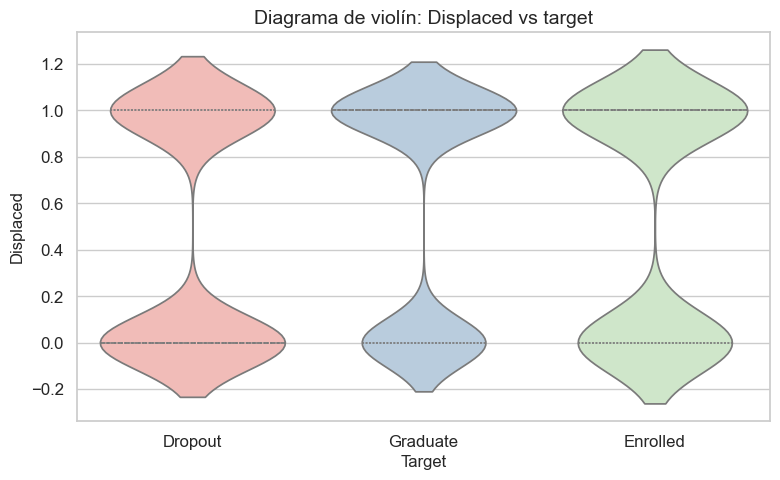

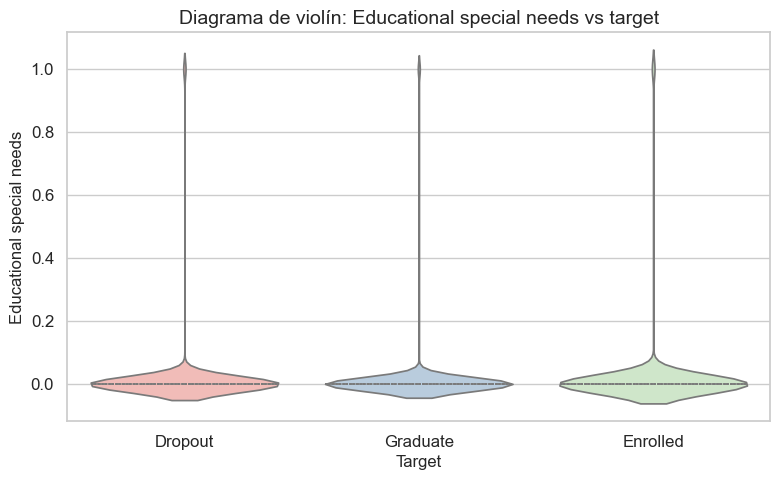

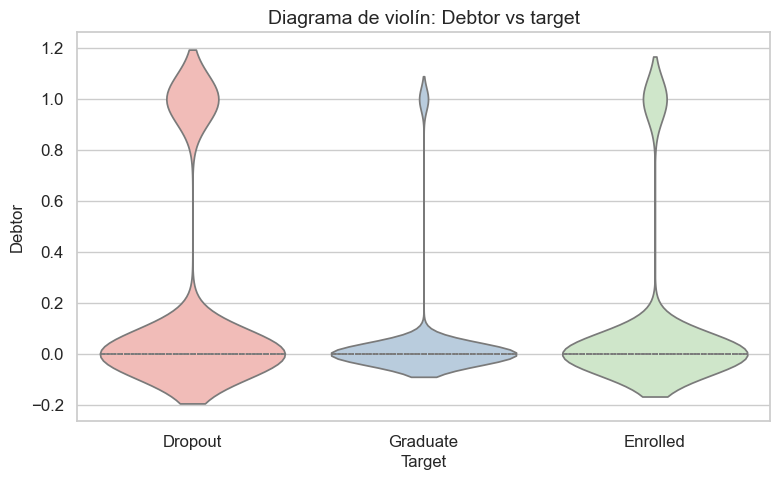

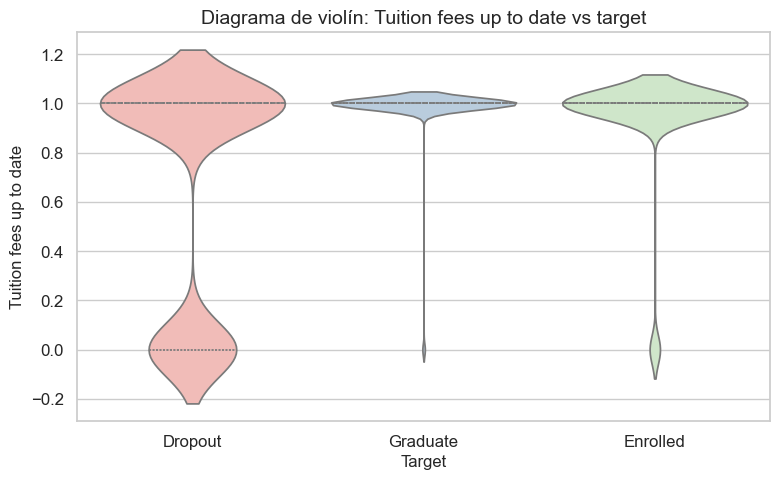

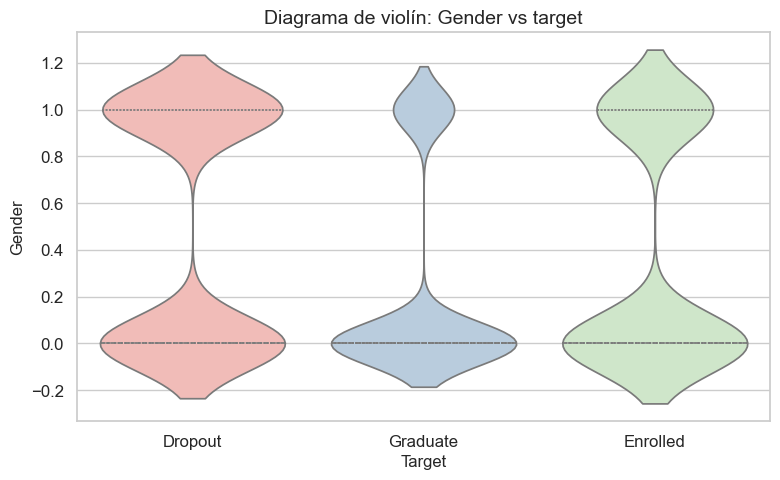

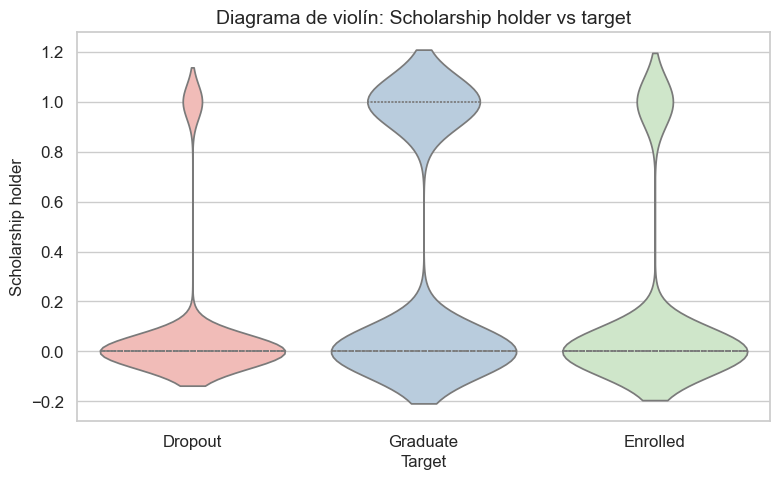

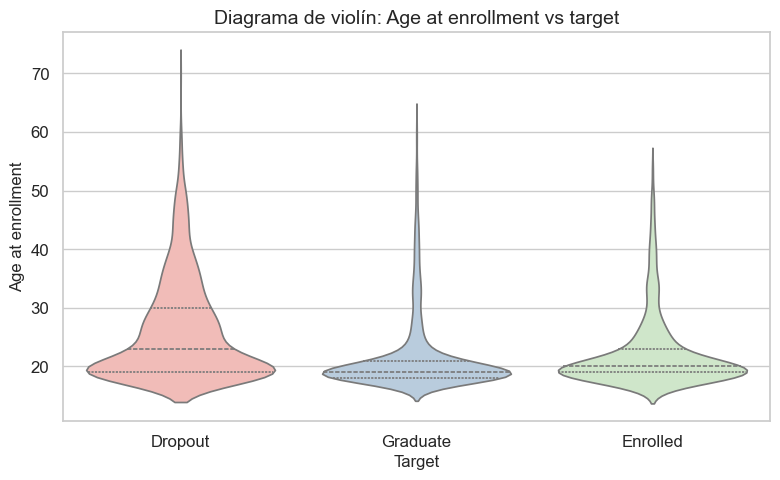

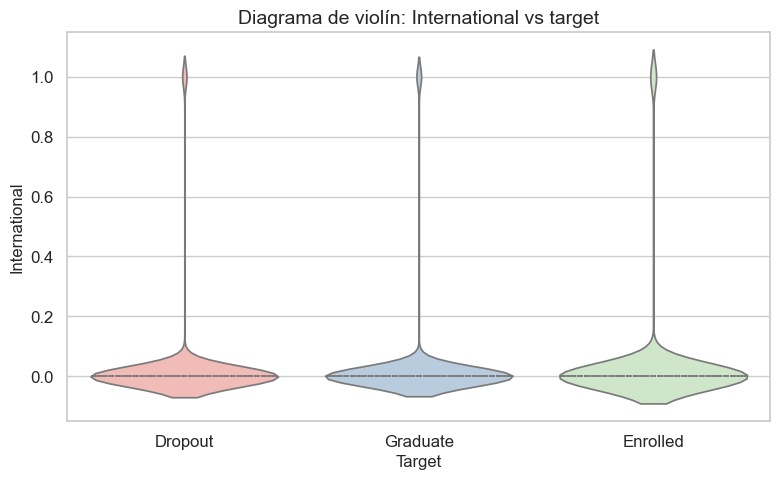

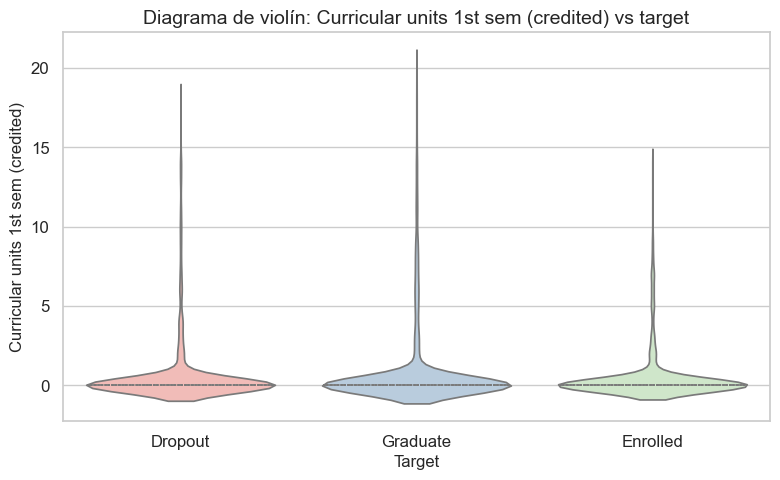

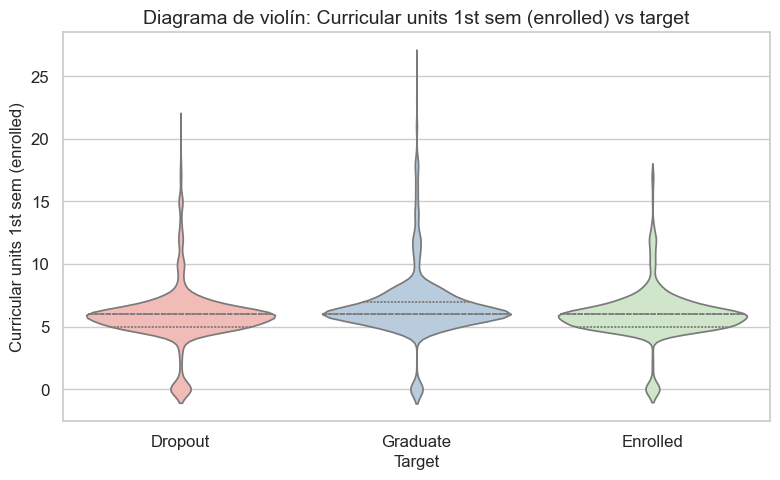

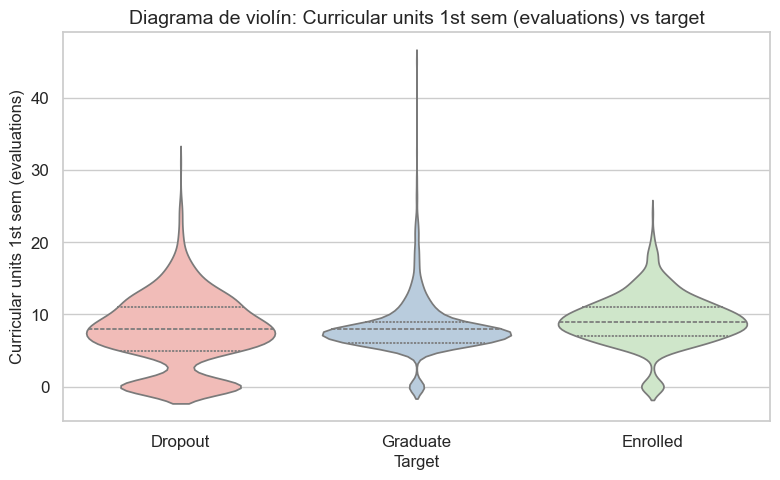

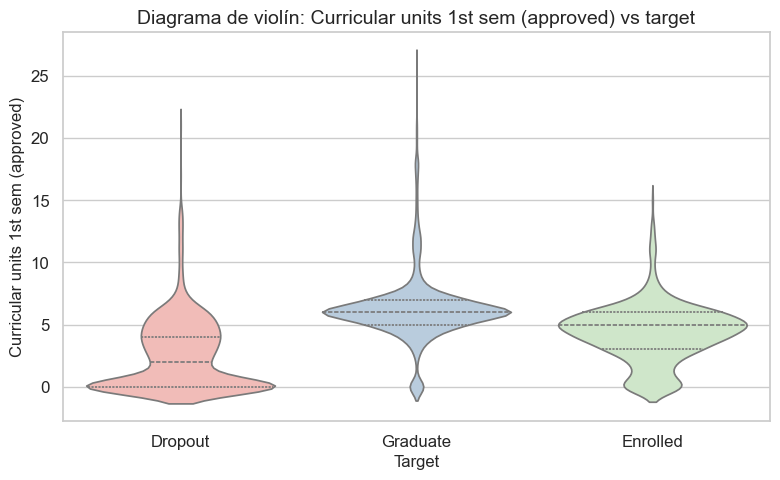

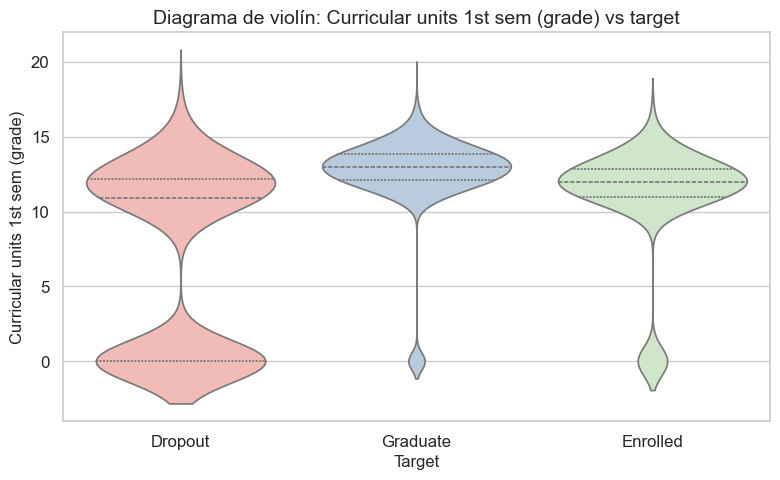

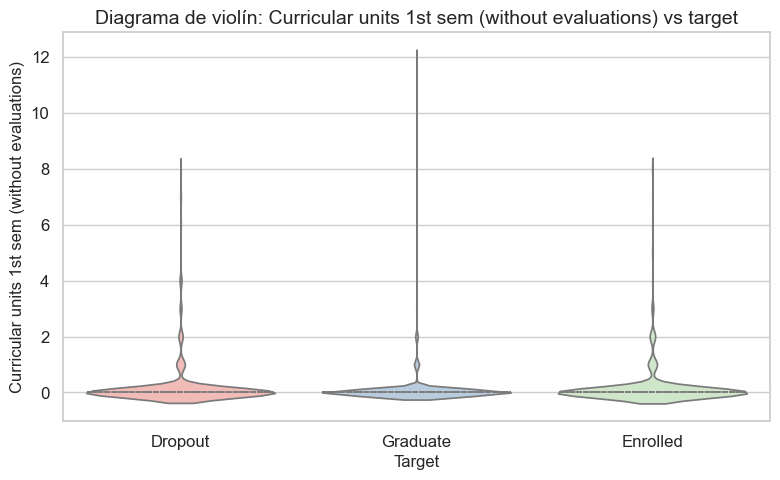

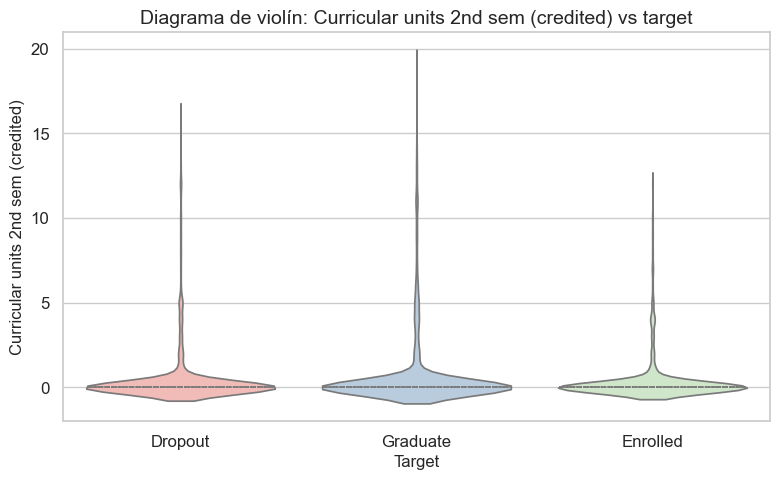

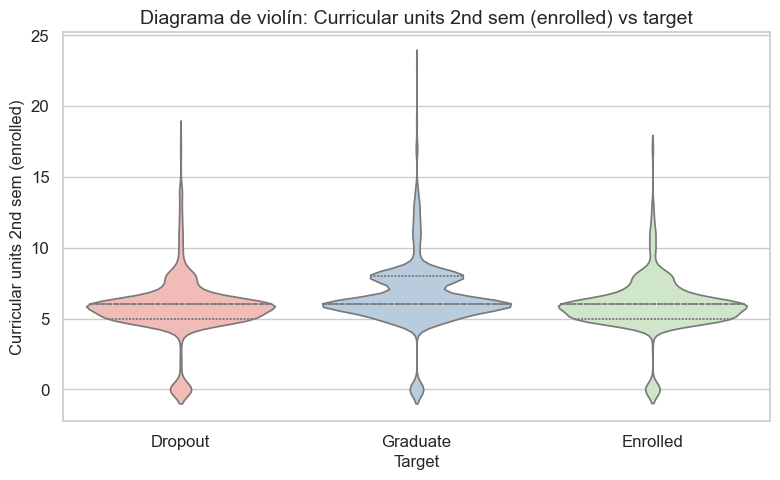

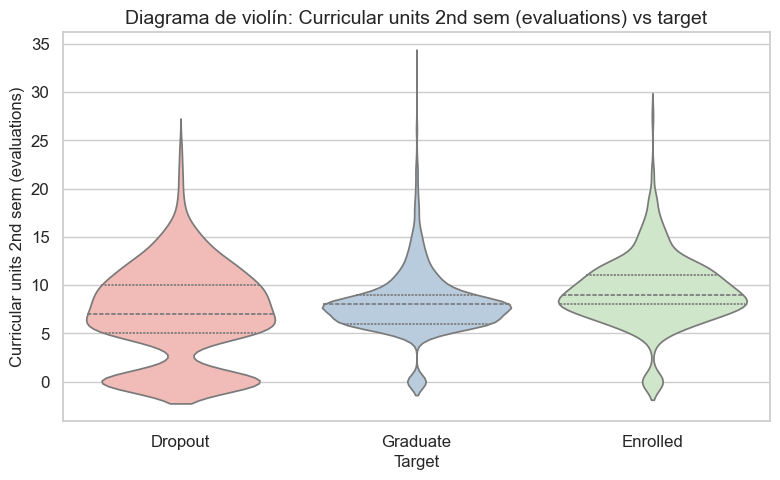

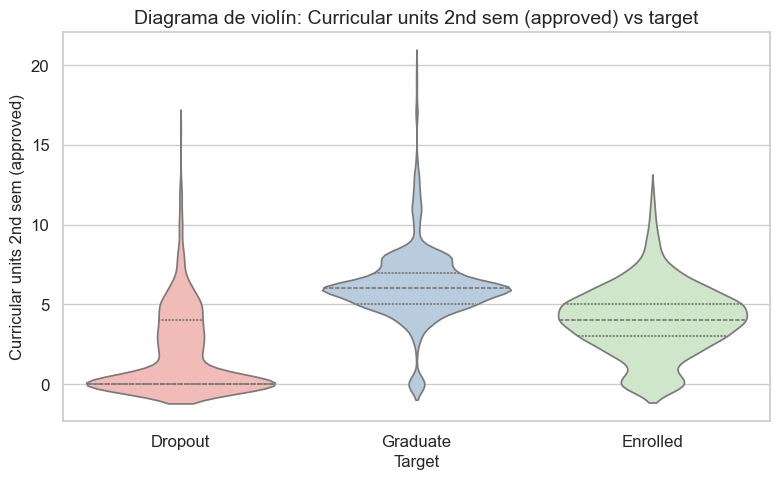

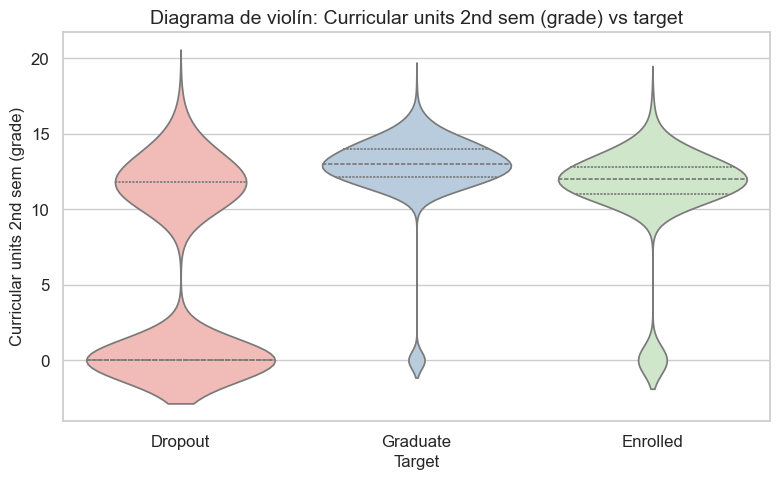

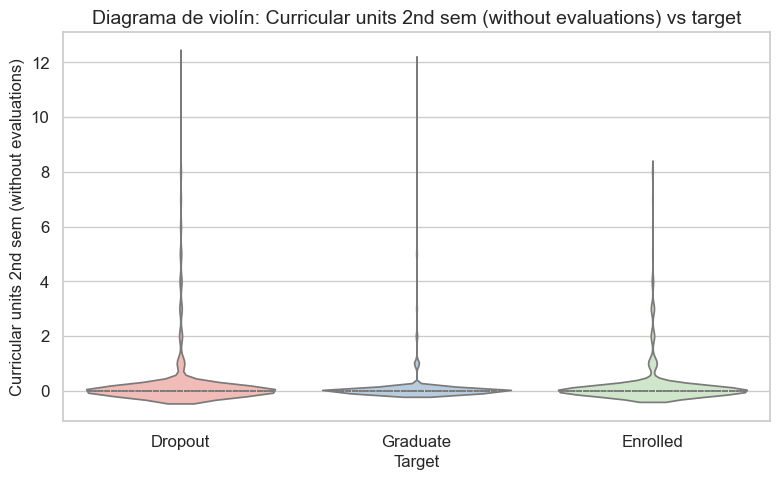

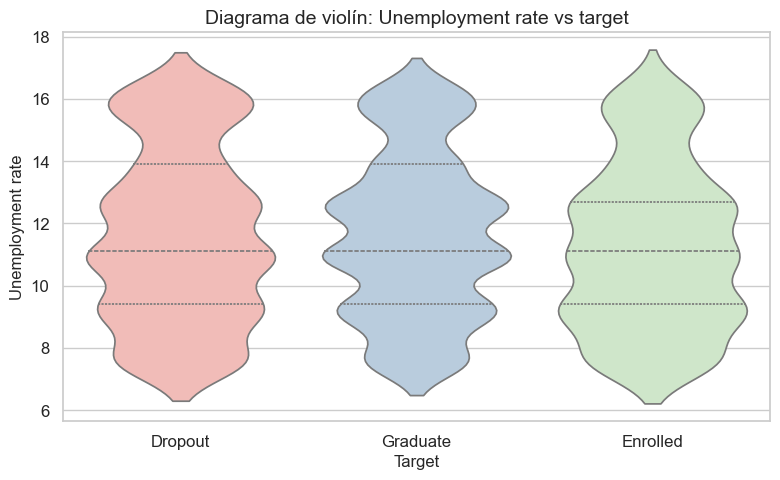

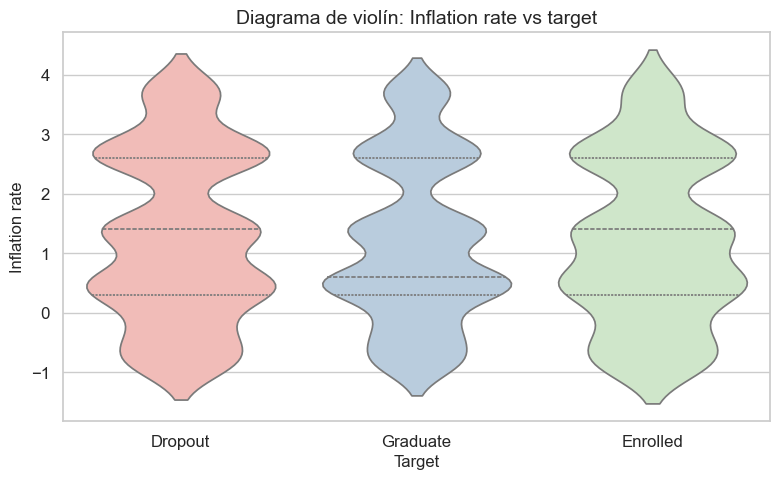

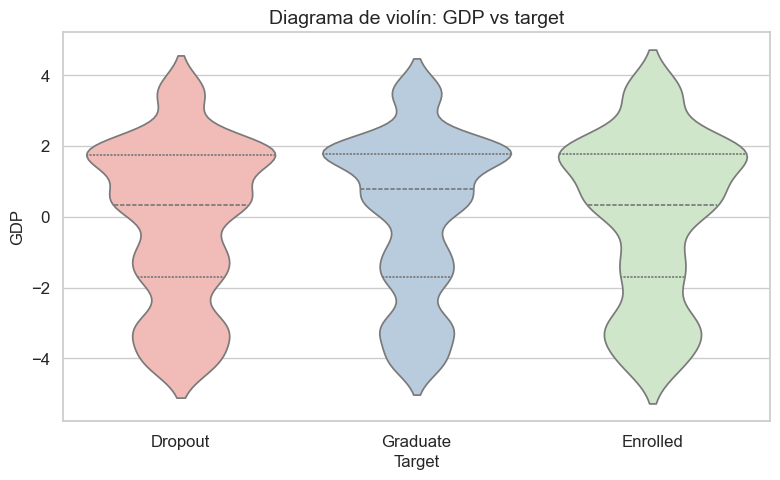

In [20]:
# Filtrar solo variables numéricas, excluyendo la variable target
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'target']

# Crear un violin plot por cada variable
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x='Target', y=col, hue='Target', inner='quartile', palette='Pastel1', legend=False)
    plt.title(f'Diagrama de violín: {col} vs target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


En terminos generales el comportamiento observado es similar en cada una de las 3 clases observadas

In [11]:
# 9. Correlaciones fuertes (|r| > 0.6)
corr = df.select_dtypes(include=['number']).corr()
mask_strong = (corr.abs() > 0.6) & (corr.abs() < 1)

strong_corrs = (
    corr.where(mask_strong)
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlación'})
)


Pares de variables con correlaciones fuertes (>|0.6|):


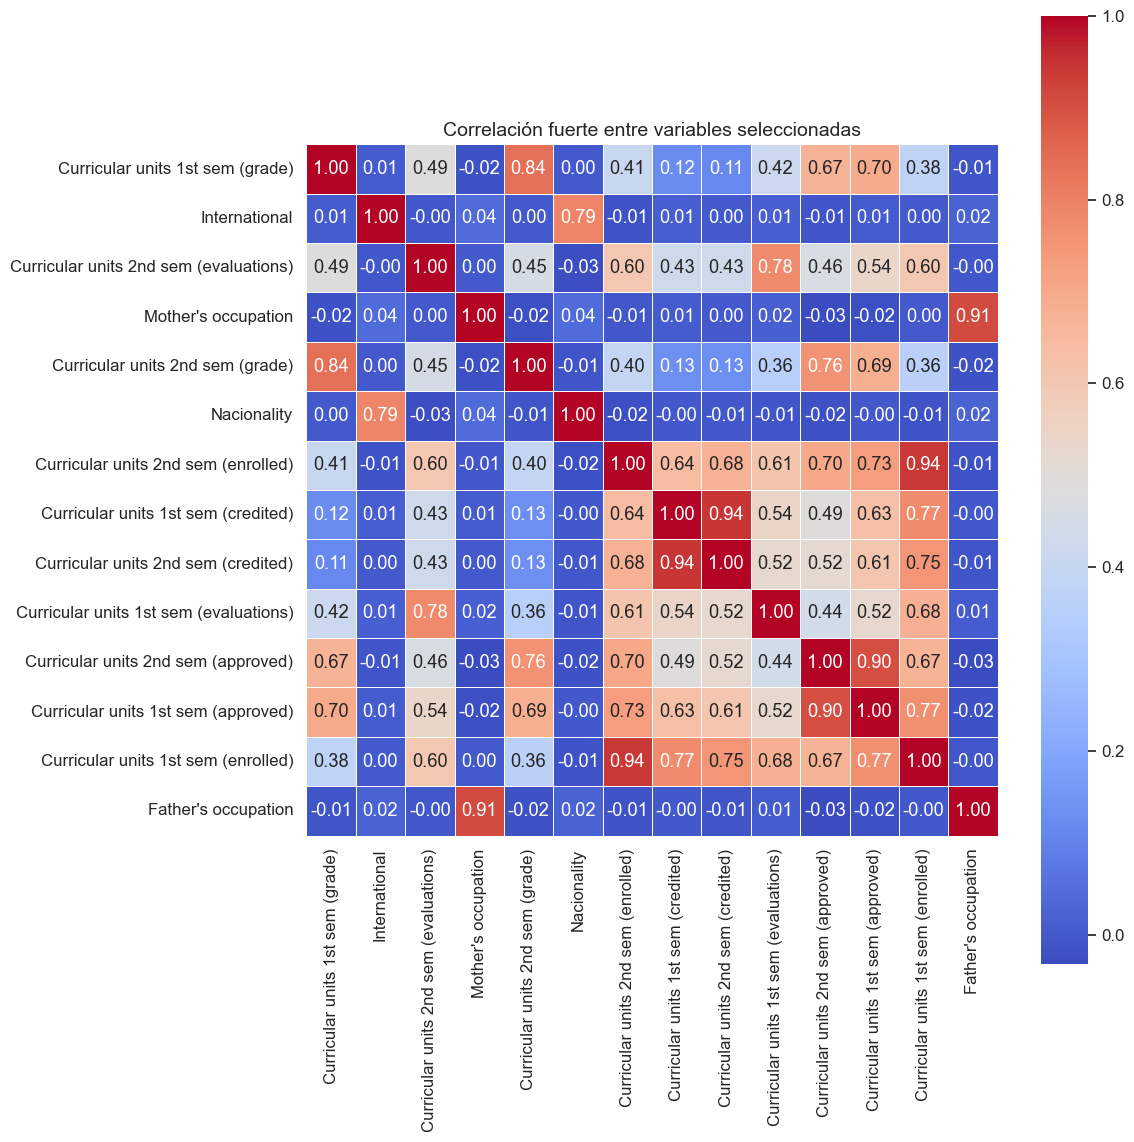

In [13]:
 # Quita duplicados reversos (A-B y B-A)
strong_corrs['key'] = strong_corrs.apply(lambda row: '-'.join(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
strong_corrs = strong_corrs.drop_duplicates('key').drop('key', axis=1)
strong_corrs = strong_corrs.reindex(strong_corrs['Correlación'].abs().sort_values(ascending=False).index)

if not strong_corrs.empty:
    print("\nPares de variables con correlaciones fuertes (>|0.6|):")
    strong_corrs
    
    # Visualización solo de las variables correlacionadas fuertemente
    top_vars = list(set(strong_corrs['Variable 1'].tolist() + strong_corrs['Variable 2'].tolist()))
    corr_top = corr.loc[top_vars, top_vars]
    plt.figure(figsize=(min(1.5*len(top_vars),12), min(1.5*len(top_vars),12)))
    sns.heatmap(corr_top, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True)
    plt.title('Correlación fuerte entre variables seleccionadas')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay pares de variables con correlación fuerte (>|0.6|).")


**Correlación entre variables seleccionadas**

La matriz de correlación muestra relaciones fuertes entre distintas métricas académicas. Se destacan correlaciones positivas altas entre las notas, créditos y evaluaciones de los dos semestres (por ejemplo, Curricular units 1st sem (grade) y Curricular units 2nd sem (grade) con r ≈ 0.84). También hay relaciones fuertes entre variables relacionadas como credited, approved y evaluations. En contraste, variables como Father's occupation, Nationality o International tienen muy baja correlación con las demás, lo que sugiere un aporte informativo limitado desde el punto de vista lineal.
